In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import pickle
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [4]:
with open("../../data/processed/data.pkl", 'rb') as handle:
    df = pickle.load(handle)

In [6]:
time_columns = []
for x in df.columns:
    if x.endswith("Time"):
        time_columns.append(x)

In [7]:
def time_conversion(x):
    time = (x.hour)*60 + x.minute
    return time

In [9]:
for column in time_columns:
    df[column] = df[column].apply(time_conversion)

In [10]:
df.columns

Index(['Date', 'Fremont Bridge Total', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'cloudCover', 'dewPoint', 'humidity',
       'moonPhase', 'precipIntensity', 'precipIntensityMax',
       'precipProbability', 'precipType', 'pressure', 'sunriseTime',
       'sunsetTime', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'temperatureMax',
       'temperatureMaxTime', 'temperatureMin', 'temperatureMinTime', 'uvIndex',
       'uvIndexTime', 'visibility', 'windBearing', 'windGust', 'windGustTime',
       'windSpeed', 'snowAccumulation', 'DayOfWeek', 'Month'],
      dtype='object')

In [13]:
for x in df.columns:
    if x.startswith('apparent'):
        df.drop(x, axis = 1, inplace = True)

In [16]:
df.drop(['temperatureMin', 'temperatureMax', 'temperatureMinTime', 'temperatureMaxTime'], axis = 1, inplace = True)

In [17]:
corr = df.corr()

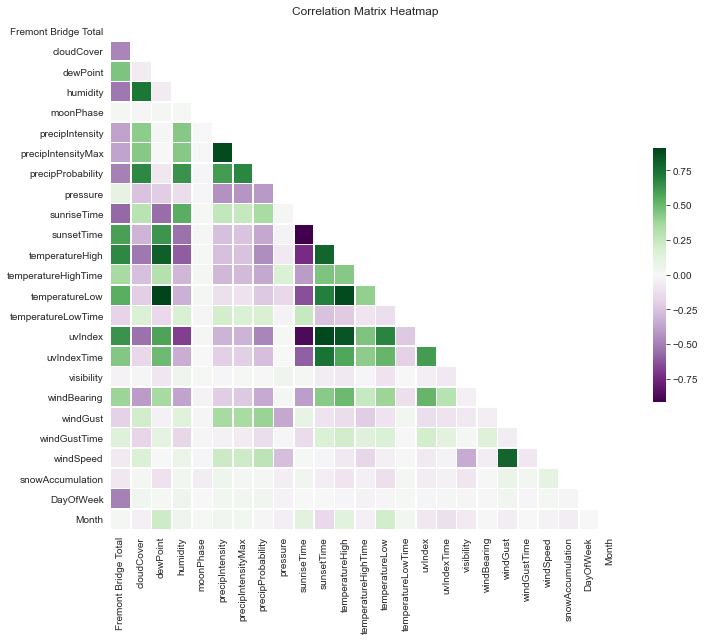

In [25]:
sns.set_style('white')
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap='PRGn', 
            #vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.savefig('corr_heatmap.png', dpi = 200);

In [19]:
df.corrwith(df['Fremont Bridge Total'])

Fremont Bridge Total    1.000000
cloudCover             -0.475971
dewPoint                0.459583
humidity               -0.522569
moonPhase               0.013534
precipIntensity        -0.375604
precipIntensityMax     -0.370911
precipProbability      -0.493362
pressure                0.098972
sunriseTime            -0.571154
sunsetTime              0.597311
temperatureHigh         0.672311
temperatureHighTime     0.357871
temperatureLow          0.547770
temperatureLowTime     -0.188356
uvIndex                 0.637436
uvIndexTime             0.446005
visibility             -0.028074
windBearing             0.385139
windGust               -0.190630
windGustTime            0.142423
windSpeed              -0.073868
snowAccumulation       -0.084063
DayOfWeek              -0.495347
Month                   0.013341
dtype: float64

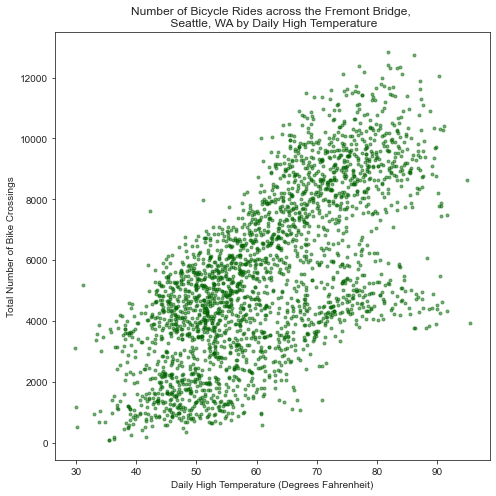

In [38]:
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize = (7, 7))
    ax.plot(df['temperatureHigh'], 
            df['Fremont Bridge Total'], 
            marker = '.', 
            alpha = 0.5, 
            color = 'darkgreen', 
            linewidth = 0)
    plt.xlabel('Daily High Temperature (Degrees Fahrenheit)')
    plt.ylabel('Total Number of Bike Crossings')
    plt.title('Number of Bicycle Rides across the Fremont Bridge, \n Seattle, WA by Daily High Temperature')
    plt.tight_layout()
    plt.savefig('rides_highttemp.png', dpi = 200);

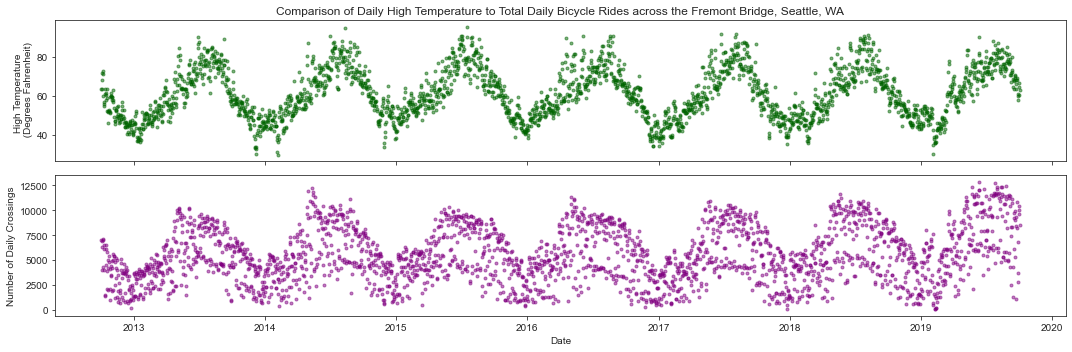

In [63]:
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(2, 1, figsize = (15, 5), sharex = True)
    ax[0].plot(df['Date'], 
            df['temperatureHigh'], 
            marker = '.', 
            alpha = 0.5, 
            color = 'darkgreen', 
            linewidth = 0)
    ax[1].plot(df['Date'],
            df['Fremont Bridge Total'],
            marker = '.', 
            alpha = 0.5, 
            color = 'purple', 
            linewidth = 0)
    ax[0].set_title("Comparison of Daily High Temperature to Total Daily Bicycle Rides across the Fremont Bridge, Seattle, WA")
    ax[1].set_xlabel("Date")
    ax[0].set_ylabel("High Temperature \n (Degrees Fahrenheit)")
    ax[1].set_ylabel("Number of Daily Crossings")
    plt.tight_layout()
    plt.savefig('BicycleRidesDailyHighTempComparison.png', dpi = 200);